### CitiBike Ridership Investigation
#### Period: Apr - Jun 2018
#### The data for this analysis was obtained from the CitiBike System Data portal

#### Ho: 24-hour citibike pass purchases are equal or significantly less on the weekend than on weekdays (p=0.05).
#### Ha: There are significantly more 24-hour citibike passes sold on the weekend than on weekdays (p=0.05).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats as stats
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('CitiBike_Q2_2018.csv')

In [3]:
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
0,4/1/18,33148,94040,257811,2363,264
1,4/2/18,22062,50418,257889,297,20
2,4/3/18,25883,59477,257942,189,21
3,4/4/18,36755,80049,258025,611,48
4,4/5/18,39814,87382,258086,972,112


In [4]:
df.tail()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
86,6/26/18,80643,171973,274006,3442,254
87,6/27/18,67647,140557,274165,2457,183
88,6/28/18,50431,104860,274290,1967,154
89,6/29/18,69856,151785,274467,3940,326
90,6/30/18,54713,134347,274628,5425,360


In [5]:
df.shape

(91, 6)

In [6]:
list(df.columns)

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Miles traveled today (midnight to 11:59 pm)',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '3-Day Passes Purchased (midnight to 11:59 pm)']

In [7]:
df.dtypes

Date                                                  object
Trips over the past 24-hours (midnight to 11:59pm)     int64
Miles traveled today (midnight to 11:59 pm)            int64
Total Annual Members (All Time)                        int64
24-Hour Passes Purchased (midnight to 11:59 pm)        int64
3-Day Passes Purchased (midnight to 11:59 pm)          int64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
0,2018-04-01,33148,94040,257811,2363,264
1,2018-04-02,22062,50418,257889,297,20
2,2018-04-03,25883,59477,257942,189,21
3,2018-04-04,36755,80049,258025,611,48
4,2018-04-05,39814,87382,258086,972,112


In [10]:
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df['Week_Day'] = df.apply(lambda x: x['Date'].weekday(), axis=1)

In [12]:
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),Week_Day
0,2018-04-01,33148,94040,257811,2363,264,6
1,2018-04-02,22062,50418,257889,297,20,0
2,2018-04-03,25883,59477,257942,189,21,1
3,2018-04-04,36755,80049,258025,611,48,2
4,2018-04-05,39814,87382,258086,972,112,3


In [13]:
df2 = df.copy()

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap.items()

dict_items([(0, 'Mon'), (1, 'Tue'), (2, 'Wed'), (3, 'Thu'), (4, 'Fri'), (5, 'Sat'), (6, 'Sun')])

In [15]:
df2['Week_Day'] = list(map(dmap.get, df2['Week_Day']))

In [16]:
df2.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),Week_Day
0,2018-04-01,33148,94040,257811,2363,264,Sun
1,2018-04-02,22062,50418,257889,297,20,Mon
2,2018-04-03,25883,59477,257942,189,21,Tue
3,2018-04-04,36755,80049,258025,611,48,Wed
4,2018-04-05,39814,87382,258086,972,112,Thu


In [17]:
df2['Week_Day'].value_counts()

Tue    13
Thu    13
Fri    13
Sun    13
Sat    13
Wed    13
Mon    13
Name: Week_Day, dtype: int64

In [18]:
df_updated = df2[['Date', '24-Hour Passes Purchased (midnight to 11:59 pm)', 'Week_Day']]

In [19]:
df_updated.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm),Week_Day
0,2018-04-01,2363,Sun
1,2018-04-02,297,Mon
2,2018-04-03,189,Tue
3,2018-04-04,611,Wed
4,2018-04-05,972,Thu


In [20]:
df_updated.set_index('Date', inplace=True)

In [21]:
df_updated.head()

,24-Hour Passes Purchased (midnight to 11:59 pm),Week_Day
Date,,
2018-04-01,2363,Sun
2018-04-02,297,Mon
2018-04-03,189,Tue
2018-04-04,611,Wed
2018-04-05,972,Thu


In [22]:
# Resample data to a weekly mean time series

df_weekly_mean = pd.DataFrame(df_updated['24-Hour Passes Purchased (midnight to 11:59 pm)'].resample('W').mean())
df_weekly_mean.head()

,24-Hour Passes Purchased (midnight to 11:59 pm)
Date,
2018-04-01,2363.000000
2018-04-08,845.571429
2018-04-15,2059.142857
2018-04-22,1746.571429
2018-04-29,2433.142857


Text(0.5, 1.0, 'Pass Purchase Frequency Time Series')

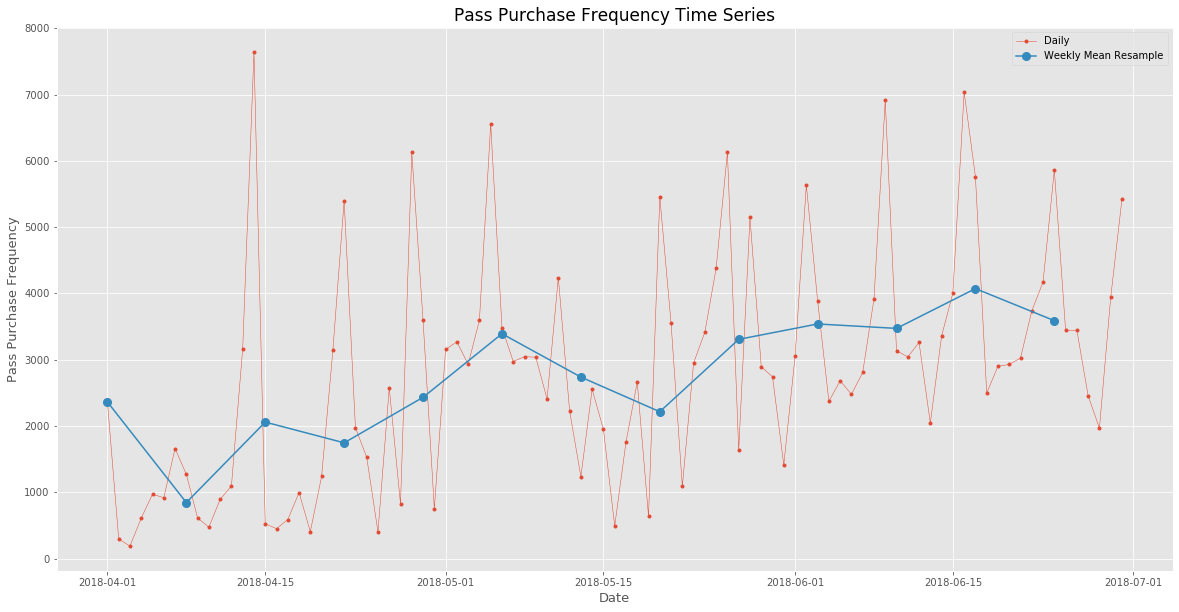

In [23]:
start, end = '2018-04-01', '2018-06-30'
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_updated.loc[start:end, '24-Hour Passes Purchased (midnight to 11:59 pm)'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, '24-Hour Passes Purchased (midnight to 11:59 pm)'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.legend()
plt.xlabel('Date', fontsize=13)
plt.ylabel('Pass Purchase Frequency', fontsize=13)
plt.title('Pass Purchase Frequency Time Series', fontsize=17)

In [25]:
df_grouped = pd.DataFrame(df.groupby('Week_Day')['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean())
df_grouped.rename(index = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)

In [26]:
df_grouped.head()

,24-Hour Passes Purchased (midnight to 11:59 pm)
Week_Day,
Mon,2282.307692
Tue,2092.615385
Wed,1946.769231
Thu,2164.384615
Fri,3051.846154


Text(0.5, 1.0, 'Weekly Pass Purchase Frequency')

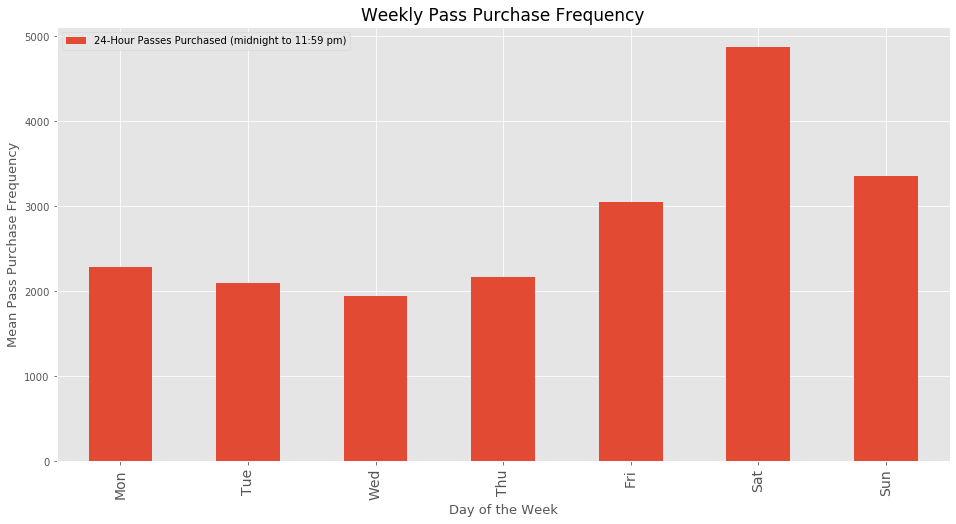

In [27]:
df_grouped.plot(kind='bar', figsize=(16,8))
plt.xlabel('Day of the Week', fontsize=13)
plt.xticks(fontsize=14)
plt.ylabel('Mean Pass Purchase Frequency', fontsize=13)
plt.title('Weekly Pass Purchase Frequency', fontsize=17)

In [28]:
# Filter Data
weekend = df_updated[(df_updated['Week_Day'] == 'Sat') | (df_updated['Week_Day'] == 'Sun')]['24-Hour Passes Purchased (midnight to 11:59 pm)']
weekend.head()

Date
2018-04-01    2363
2018-04-07    1661
2018-04-08    1271
2018-04-14    7643
2018-04-15     525
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: int64

In [29]:
weekday = df_updated[(df_updated['Week_Day'] == 'Mon') | (df_updated['Week_Day'] == 'Tue') | (df_updated['Week_Day'] == 'Wed') | 
        (df_updated['Week_Day'] == 'Thu') | (df_updated['Week_Day'] == 'Fri')]['24-Hour Passes Purchased (midnight to 11:59 pm)']

In [30]:
weekday.head()

Date
2018-04-02    297
2018-04-03    189
2018-04-04    611
2018-04-05    972
2018-04-06    918
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: int64

In [31]:
weekend.describe()

count      26.000000
mean     4112.461538
std      2181.206331
min       525.000000
25%      2261.000000
50%      4032.000000
75%      5836.500000
max      7643.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

In [32]:
weekday.describe()

count      65.000000
mean     2307.584615
std      1227.832247
min       189.000000
25%      1090.000000
50%      2578.000000
75%      3155.000000
max      5148.000000
Name: 24-Hour Passes Purchased (midnight to 11:59 pm), dtype: float64

### T-test Analysis

In [33]:
stats.ttest_ind(weekend, weekday, axis=0, equal_var=False)

Ttest_indResult(statistic=3.9748791093455087, pvalue=0.000382935963275139)

#### Based on the T-Test analysis results, it is safe to reject the null hypothesis and accept the alternative hypothesis - there are significantly more 24-hour passes sold during the weekend compared to weekdays. 

In [34]:
import seaborn as sns

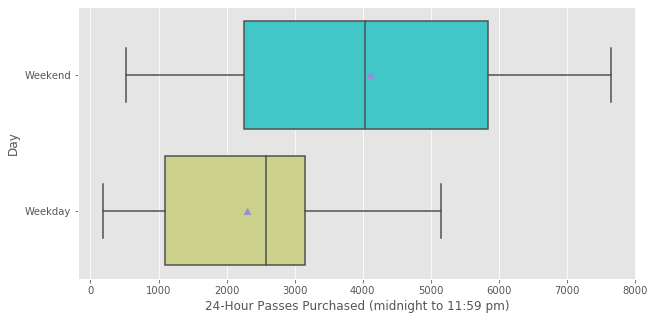

In [36]:
weekend = pd.DataFrame(weekend)
weekend['Day'] = 'Weekend'
weekday = pd.DataFrame(weekday)
weekday['Day'] = 'Weekday'
cdf = pd.concat([weekend, weekday])
cdf.head()
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="24-Hour Passes Purchased (midnight to 11:59 pm)", y="Day",data=cdf, palette='rainbow', showmeans=True)

### Median number of passes sold is higher for the weekend than it is for weekdays